# 1. Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

importing all modules

In [2]:
data = pd.read_csv('emails.csv')

In [3]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


Columns in data:
* Text: the messages in the email
* Spam: 1 value is spam, 0 value is not spam

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


Info:
* Total of 5728 emails in data.
* No NaN value.

In [5]:
data['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

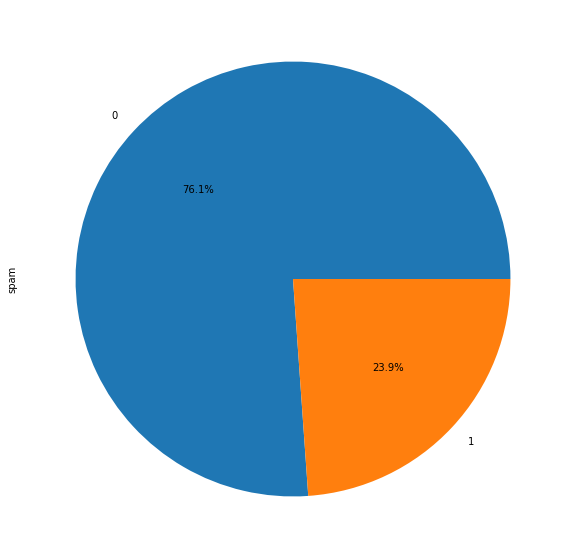

In [6]:
data['spam'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,10))

Spam:
* 4360 (76.1%) of total emails in data is not spam
* 1368 (23.9%) of total emails in data is spam

# 2. Naive Bayes Model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['text'],data['spam'], test_size = 0.3, random_state = 110)

splitting data for training and testing model (0.7 train and 0.3 test)

In [8]:
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

CountVectorizer is used to convert/transform the text/string value in column text (X) into sparse matrix in order for Naive Bayes model to classify emails into spam or ham (not spam) using default english as stop_words to represent the content of the emails (informative or not informative).

In [9]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '000000',
 '00000000',
 '0000000000',
 '000000000003619',
 '000000000003991',
 '000000000003997',
 '000000000005168',
 '000000000005409',
 '000000000005411',
 '000000000005413',
 '000000000005820',
 '000000000006238',
 '000000000006452',
 '000000000007494',
 '000000000007876',
 '000000000011185',
 '000000000012677',
 '000000000012734',
 '000000000012735',
 '000000000012736',
 '000000000012741',
 '000000000012987',
 '000000000013085',
 '000000000015384',
 '000000000015793',
 '000000000023619',
 '000000000024099',
 '000000000025307',
 '0000102789',
 '0000104281',
 '0000104282',
 '0000104486',
 '0000104631',
 '0000104730',
 '0000104776',
 '0000104778',
 '0000107043',
 '0000108729',
 '000066',
 '0001',
 '000166',
 '0002',
 '000202',
 '0003',
 '0004',
 '0006',
 '0009249480',
 '0009249481',
 '0009249504',
 '0009249505',
 '0009249506',
 '001',
 '0011',
 '0015',
 '002',
 '00225',
 '00235424',
 '002813',
 '003',
 '0031',
 '003399',
 '00343938',
 '0044',
 '005',
 '0052',

Array mapping from feature integer indices to feature name.

In [10]:
X_train_vect = vectorizer.transform(X_train)
X_test_vect = vectorizer.transform(X_test)

Transforming text column

In [11]:
X_train_vect

<4009x31002 sparse matrix of type '<class 'numpy.int64'>'
	with 356198 stored elements in Compressed Sparse Row format>

Checking the type of transformed text into sparse matrix

In [12]:
prediction = {}
model = MultinomialNB()
model.fit(X_train_vect,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

* Empty dictionary prediction that will be added with prediction from model.
* Multinomial Naive Bayes model used as the model (put into variable model).

In [13]:
prediction['NB'] = model.predict(X_test_vect)

Model prediction added to empty dictionary with key 'NB'

In [14]:
print(classification_report(y_test, prediction['NB'], target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99      1307
        Spam       0.98      0.98      0.98       412

    accuracy                           0.99      1719
   macro avg       0.99      0.99      0.99      1719
weighted avg       0.99      0.99      0.99      1719



In [15]:
accuracy_score(y_test,prediction['NB'])

0.9906922629435718

Model accuracy is high with high precision and recall. I think the model used is a success for this data.